In [1]:
# Data Analysis Phase
## MAin aim is to understand more about the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [2]:
dataset=pd.read_csv('qh2-rcc120.csv')


## print shape of dataset with rows and columns
print(dataset.shape)

(13870, 23)


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13870 entries, 0 to 13869
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   13870 non-null  object 
 1   Series               13870 non-null  object 
 2   Time                 13870 non-null  object 
 3   CPU_Load             13870 non-null  float64
 4   Power                13870 non-null  float64
 5   Network_RX           13870 non-null  float64
 6   Network_TX           13870 non-null  float64
 7   Inlet_Temperature    13870 non-null  float64
 8   CPU1_Temperature     13870 non-null  float64
 9   CPU2_Temperature     13870 non-null  float64
 10  Fan_speed1           13870 non-null  float64
 11  Fan_speed2           13870 non-null  float64
 12  Fan_speed3           13870 non-null  float64
 13  Fan_speed4           13870 non-null  float64
 14  Ram                  13870 non-null  float64
 15  Ram_Used             13870 non-null 

In [4]:
dataset.head()

,Id,Series,Time,CPU_Load,Power,Network_RX,Network_TX,Inlet_Temperature,CPU1_Temperature,CPU2_Temperature,Fan_speed1,Fan_speed2,Fan_speed3,Fan_speed4,Ram,Ram_Used,No_Of_Running_vms,CPU_cores,CPU_cores_used,Ambient_Temperature,Cooling_Power,Total_Power,CPU_Temp_Max
0,qh2-rcc1202018-10-0911:20:00,qh2-rcc120,09-10-2018 11:20,3.468500,90.533333,408343.33840,147737.9533,16.966667,37.083333,36.716667,7502.833333,7571.666667,7500.500000,7462.000000,515639.0,301622.0,15.0,64,63.0,54.050000,39.277494,129.810828,37.083333
1,qh2-rcc1202018-10-0911:30:00,qh2-rcc120,09-10-2018 11:30,3.622833,88.933333,44589.40701,202395.9248,17.000000,37.783333,37.083333,7141.166667,7182.000000,7147.000000,7113.166667,515639.0,301622.0,15.0,64,63.0,54.783333,38.583341,127.516674,37.783333
2,qh2-rcc1202018-10-0911:40:00,qh2-rcc120,09-10-2018 11:40,3.414500,88.800000,40146.87245,157905.9633,17.000000,38.233333,37.466667,6728.166667,6802.833333,6743.333333,6729.333333,515639.0,301622.0,15.0,64,63.0,55.233333,38.525495,127.325495,38.233333
3,qh2-rcc1202018-10-0911:50:00,qh2-rcc120,09-10-2018 11:50,3.332500,89.866667,441692.38530,142941.0345,17.000000,38.183333,37.550000,6813.333333,6856.500000,6808.666667,6771.333333,515639.0,301622.0,15.0,64,63.0,55.183333,38.988264,128.854930,38.183333
4,qh2-rcc1202018-10-0912:00:00,qh2-rcc120,09-10-2018 12:00,3.364000,89.600000,422057.82230,770341.8938,16.950000,37.416667,36.866667,7390.833333,7445.666667,7401.333333,7351.166667,515639.0,301622.0,15.0,64,63.0,54.366667,38.872572,128.472572,37.416667


In [5]:
dataset['Ram_Used']=dataset['Ram_Used']/dataset['Ram']
dataset['CPU_cores_used']=dataset['CPU_cores_used']/dataset['CPU_cores']

In [6]:
dataset= dataset.drop(['Ram','CPU_cores'], axis=1)

In [7]:
dataset.head()

,Id,Series,Time,CPU_Load,Power,Network_RX,Network_TX,Inlet_Temperature,CPU1_Temperature,CPU2_Temperature,Fan_speed1,Fan_speed2,Fan_speed3,Fan_speed4,Ram_Used,No_Of_Running_vms,CPU_cores_used,Ambient_Temperature,Cooling_Power,Total_Power,CPU_Temp_Max
0,qh2-rcc1202018-10-0911:20:00,qh2-rcc120,09-10-2018 11:20,3.468500,90.533333,408343.33840,147737.9533,16.966667,37.083333,36.716667,7502.833333,7571.666667,7500.500000,7462.000000,0.584948,15.0,0.984375,54.050000,39.277494,129.810828,37.083333
1,qh2-rcc1202018-10-0911:30:00,qh2-rcc120,09-10-2018 11:30,3.622833,88.933333,44589.40701,202395.9248,17.000000,37.783333,37.083333,7141.166667,7182.000000,7147.000000,7113.166667,0.584948,15.0,0.984375,54.783333,38.583341,127.516674,37.783333
2,qh2-rcc1202018-10-0911:40:00,qh2-rcc120,09-10-2018 11:40,3.414500,88.800000,40146.87245,157905.9633,17.000000,38.233333,37.466667,6728.166667,6802.833333,6743.333333,6729.333333,0.584948,15.0,0.984375,55.233333,38.525495,127.325495,38.233333
3,qh2-rcc1202018-10-0911:50:00,qh2-rcc120,09-10-2018 11:50,3.332500,89.866667,441692.38530,142941.0345,17.000000,38.183333,37.550000,6813.333333,6856.500000,6808.666667,6771.333333,0.584948,15.0,0.984375,55.183333,38.988264,128.854930,38.183333
4,qh2-rcc1202018-10-0912:00:00,qh2-rcc120,09-10-2018 12:00,3.364000,89.600000,422057.82230,770341.8938,16.950000,37.416667,36.866667,7390.833333,7445.666667,7401.333333,7351.166667,0.584948,15.0,0.984375,54.366667,38.872572,128.472572,37.416667


# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

        

In [8]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

In [9]:
dataset[numerical_features].shape

(13870, 18)

In [10]:
dataset[numerical_features].head()

,CPU_Load,Power,Network_RX,Network_TX,Inlet_Temperature,CPU1_Temperature,CPU2_Temperature,Fan_speed1,Fan_speed2,Fan_speed3,Fan_speed4,Ram_Used,No_Of_Running_vms,CPU_cores_used,Ambient_Temperature,Cooling_Power,Total_Power,CPU_Temp_Max
0,3.468500,90.533333,408343.33840,147737.9533,16.966667,37.083333,36.716667,7502.833333,7571.666667,7500.500000,7462.000000,0.584948,15.0,0.984375,54.050000,39.277494,129.810828,37.083333
1,3.622833,88.933333,44589.40701,202395.9248,17.000000,37.783333,37.083333,7141.166667,7182.000000,7147.000000,7113.166667,0.584948,15.0,0.984375,54.783333,38.583341,127.516674,37.783333
2,3.414500,88.800000,40146.87245,157905.9633,17.000000,38.233333,37.466667,6728.166667,6802.833333,6743.333333,6729.333333,0.584948,15.0,0.984375,55.233333,38.525495,127.325495,38.233333
3,3.332500,89.866667,441692.38530,142941.0345,17.000000,38.183333,37.550000,6813.333333,6856.500000,6808.666667,6771.333333,0.584948,15.0,0.984375,55.183333,38.988264,128.854930,38.183333
4,3.364000,89.600000,422057.82230,770341.8938,16.950000,37.416667,36.866667,7390.833333,7445.666667,7401.333333,7351.166667,0.584948,15.0,0.984375,54.366667,38.872572,128.472572,37.416667


In [11]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<40 ]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 2


In [12]:
discrete_feature

['No_Of_Running_vms', 'CPU_cores_used']

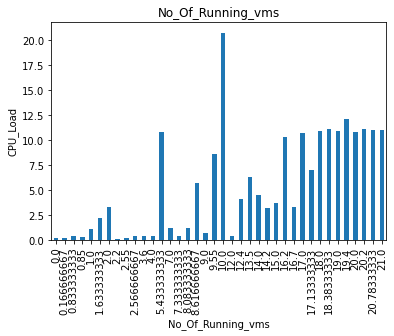

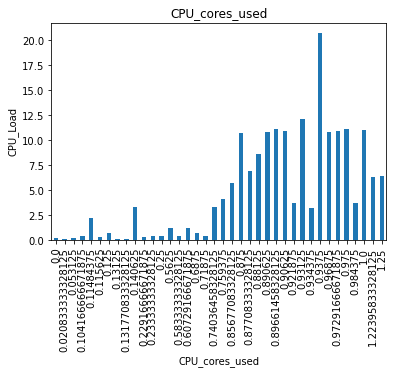

In [13]:
## Lets Find the realtionship between them and CPU_Load

for feature in discrete_feature:
    data=dataset.copy()
    data.groupby(feature)['CPU_Load'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('CPU_Load')
    plt.title(feature)
    plt.show()

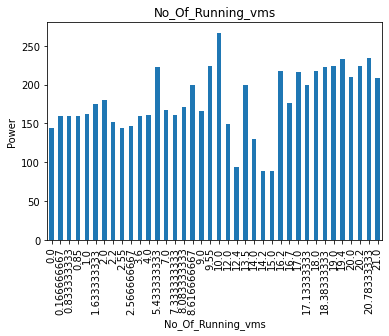

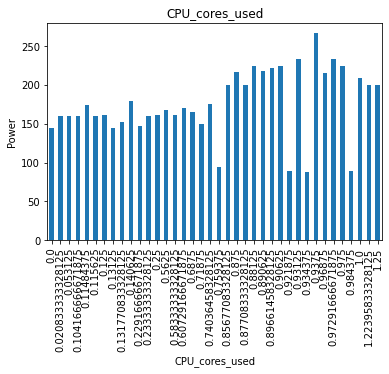

In [14]:
## Lets Find the realtionship between them and Power

for feature in discrete_feature:
    data=dataset.copy()
    data.groupby(feature)['Power'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Power')
    plt.title(feature)
    plt.show()

In [15]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 16


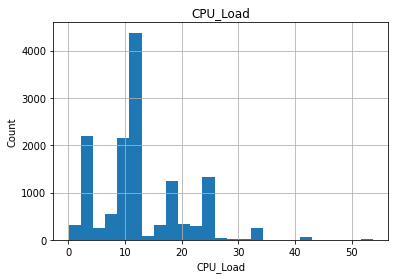

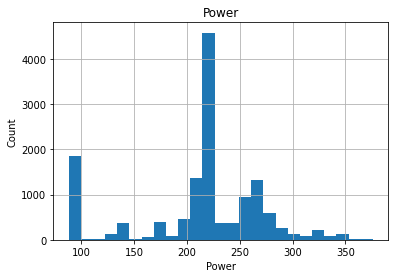

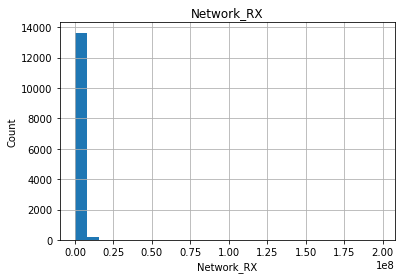

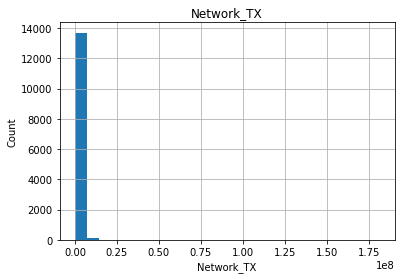

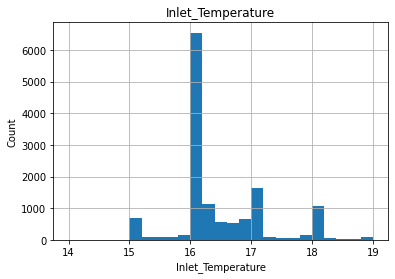

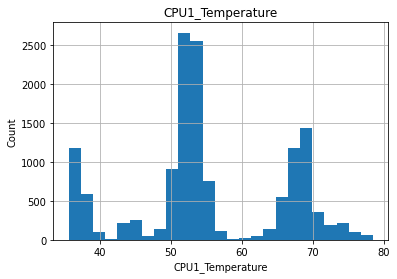

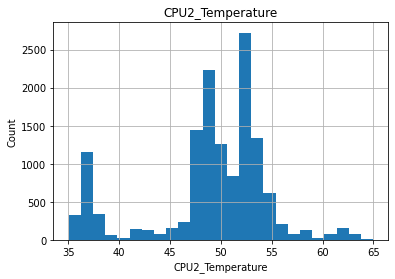

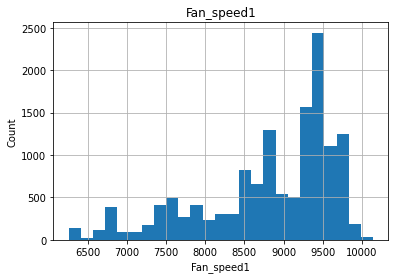

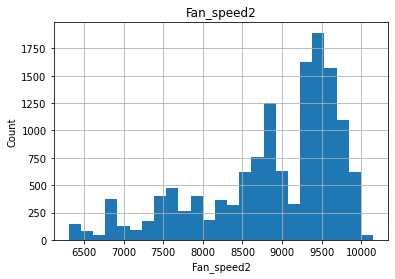

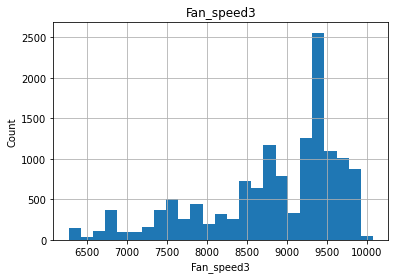

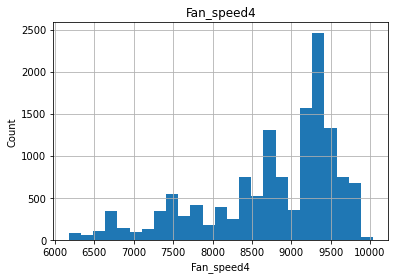

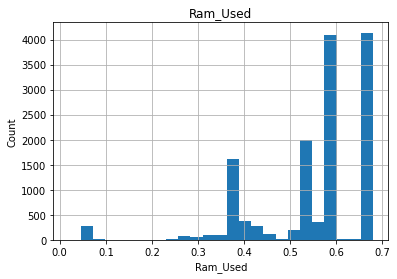

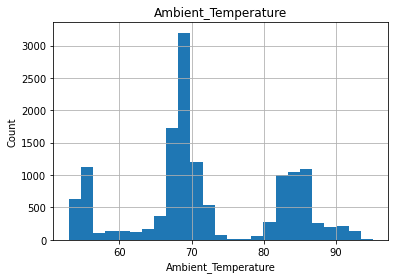

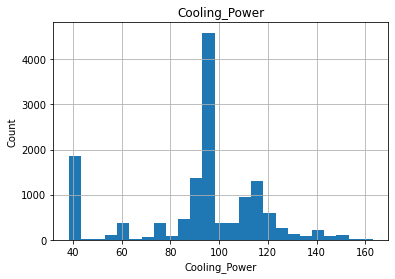

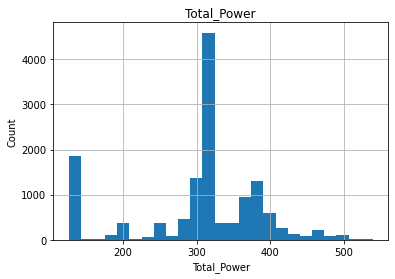

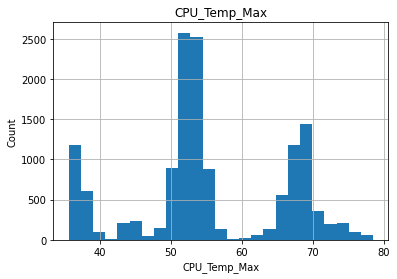

In [16]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

c:\phython39\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


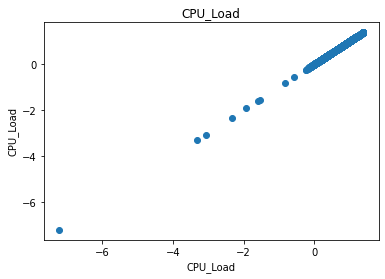

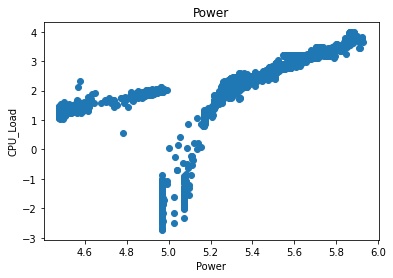

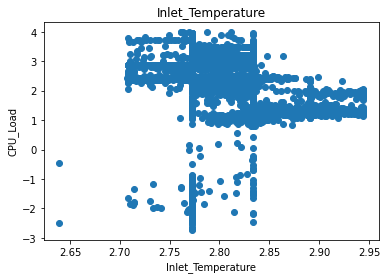

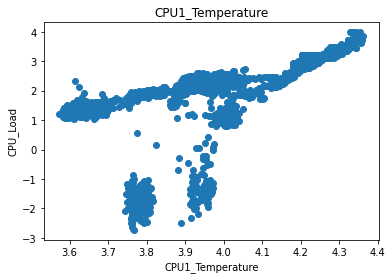

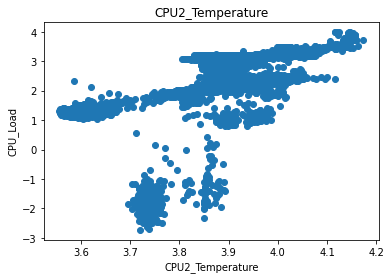

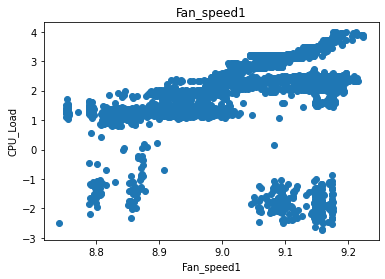

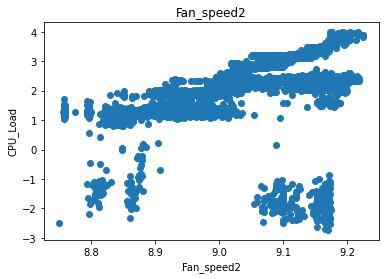

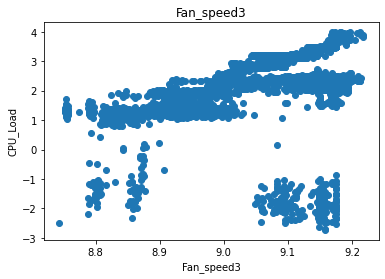

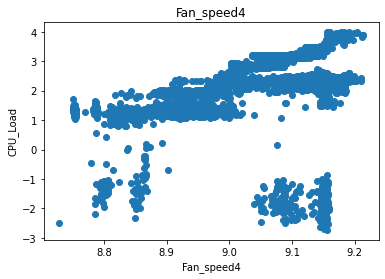

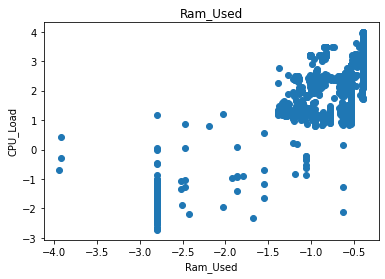

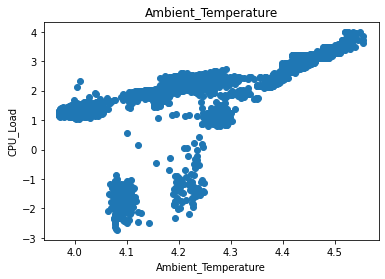

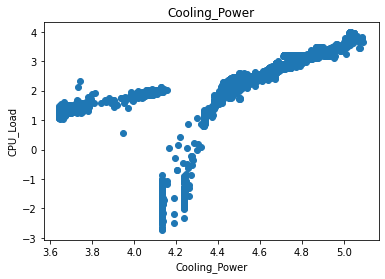

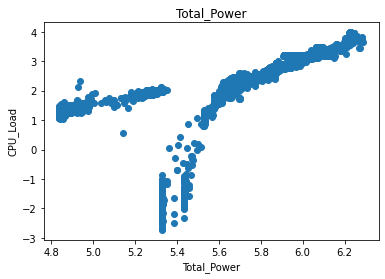

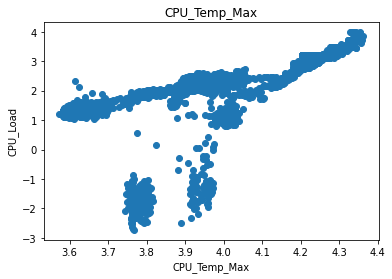

In [17]:
## We will be using logarithmic transformation


for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['CPU_Load']=np.log(data['CPU_Load'])
        plt.scatter(data[feature],data['CPU_Load'])
        plt.xlabel(feature)
        plt.ylabel('CPU_Load')
        plt.title(feature)
        plt.show()
        
    

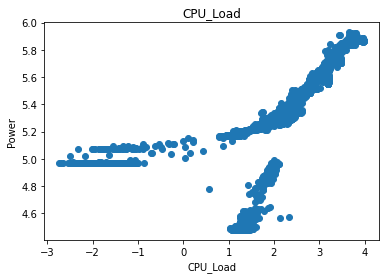

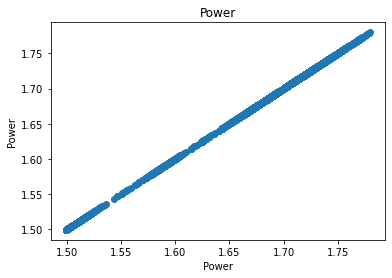

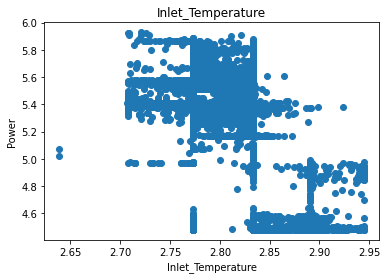

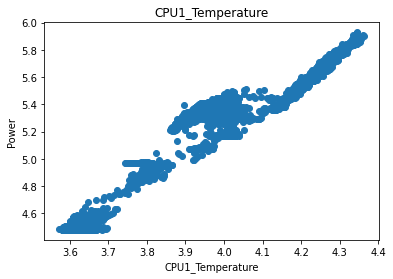

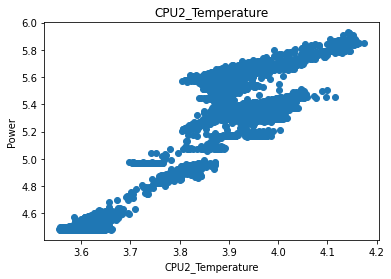

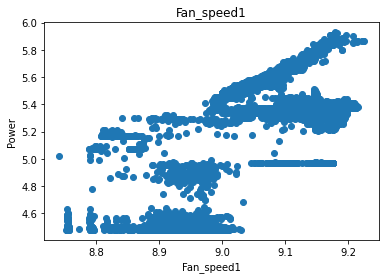

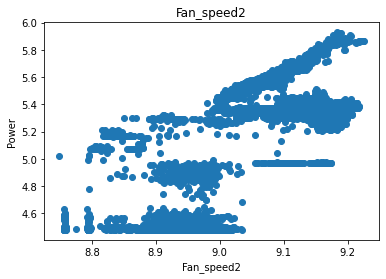

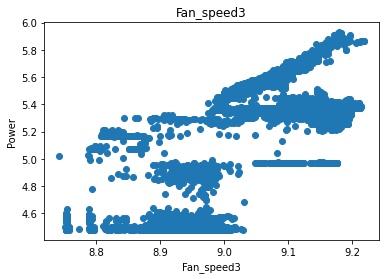

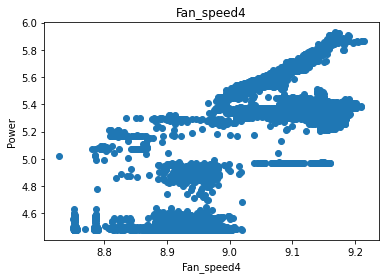

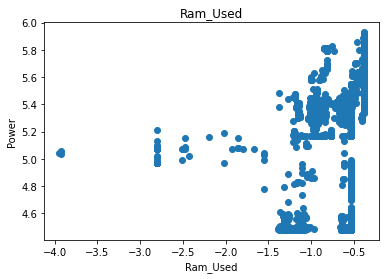

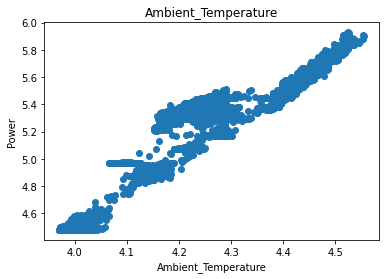

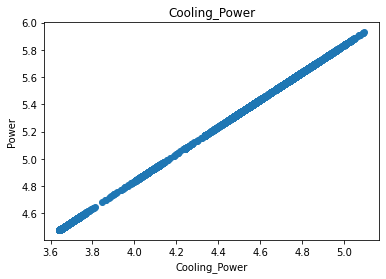

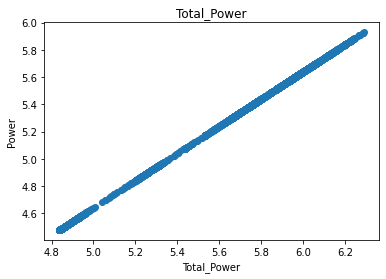

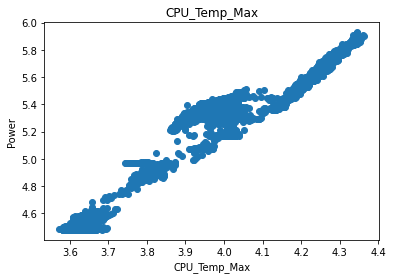

In [18]:
## We will be using logarithmic transformation


for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['Power']=np.log(data['Power'])
        plt.scatter(data[feature],data['Power'])
        plt.xlabel(feature)
        plt.ylabel('Power')
        plt.title(feature)
        plt.show()
        
    

Outlievers 


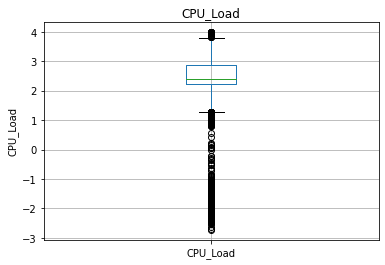

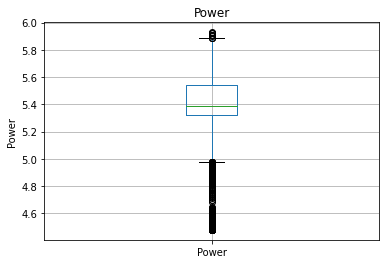

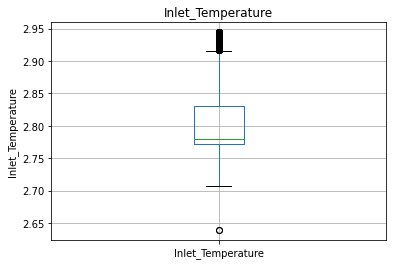

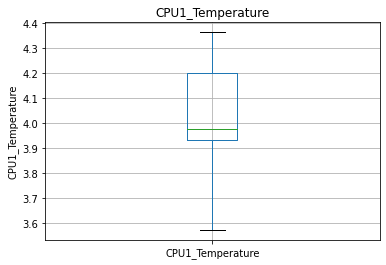

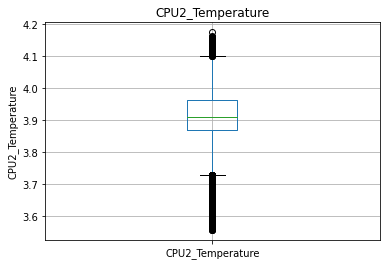

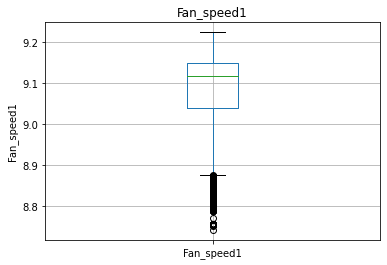

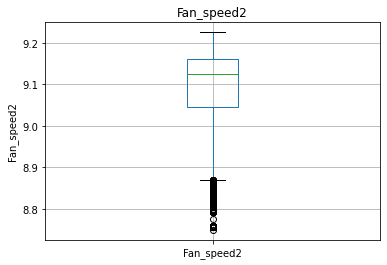

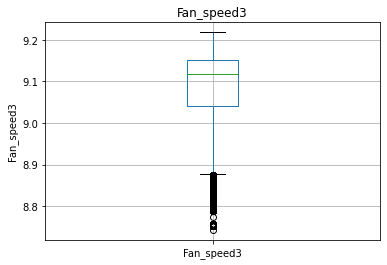

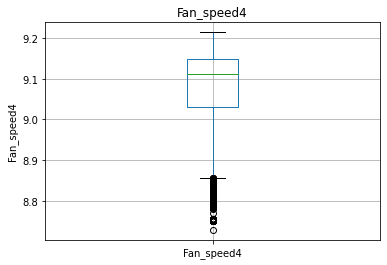

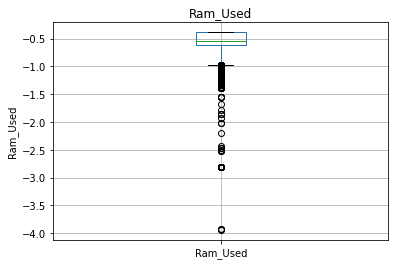

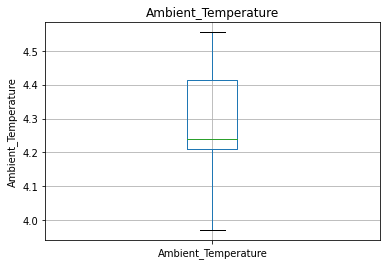

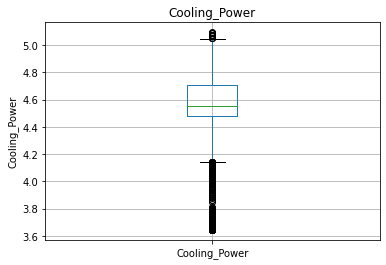

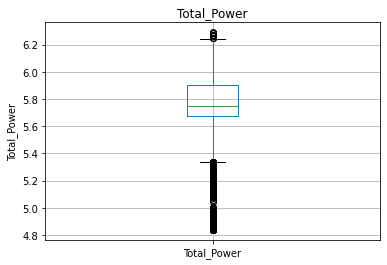

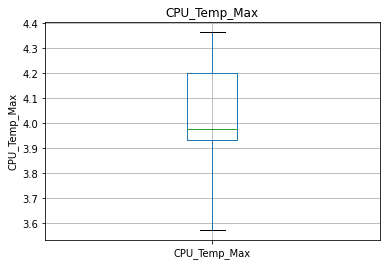

In [19]:
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        

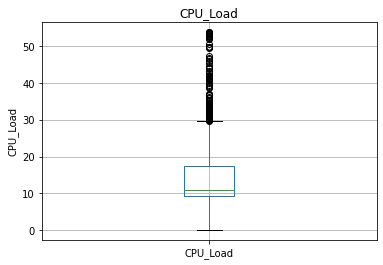

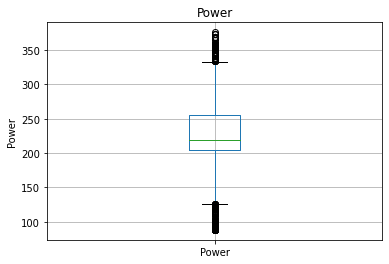

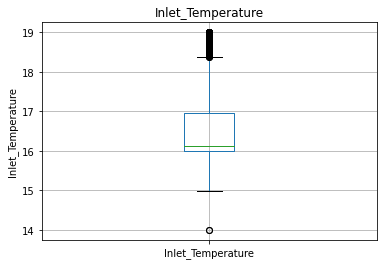

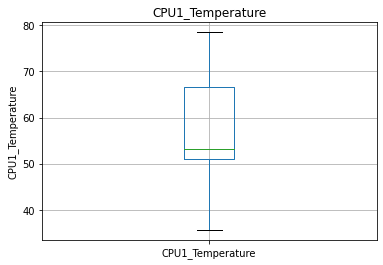

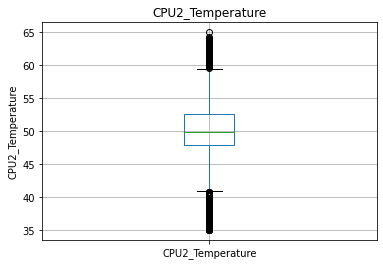

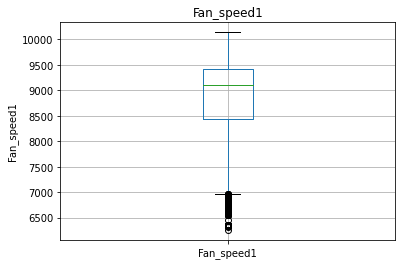

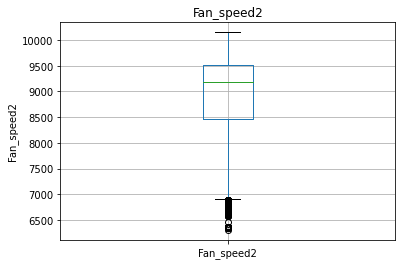

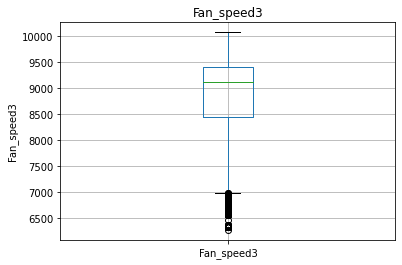

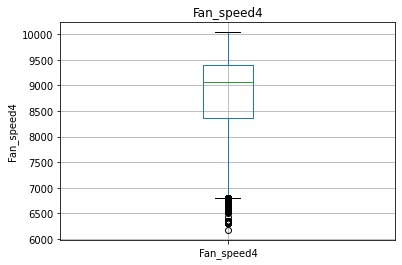

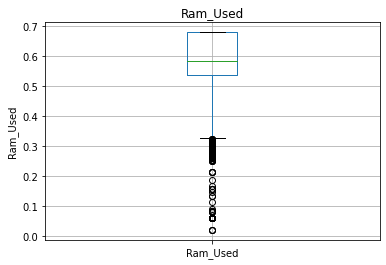

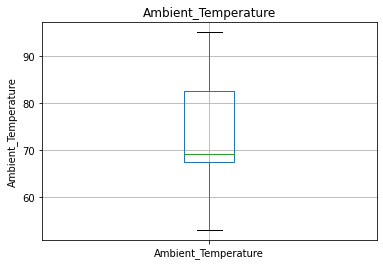

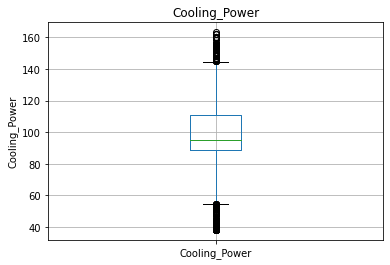

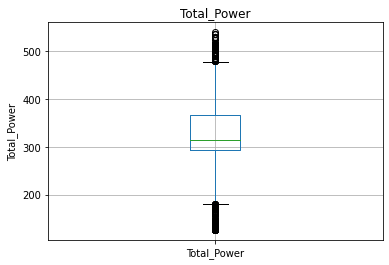

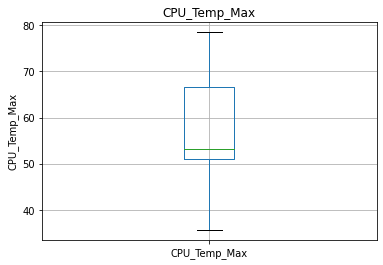

In [20]:
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

### Feature engineering


We will be performing all the below steps in Feature Engineering

1. Missing values
2. Temporal variables
3. Categorical variables: remove rare labels
4. Standarise the values of the variables to the same range

## feature selection 
drop constant feature

In [21]:
numerical_dataset= dataset[numerical_features]

In [22]:
### It will zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(numerical_dataset)

VarianceThreshold(threshold=0)

In [23]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [24]:
numerical_dataset.columns[var_thres.get_support()]

Index(['CPU_Load', 'Power', 'Network_RX', 'Network_TX', 'Inlet_Temperature',
       'CPU1_Temperature', 'CPU2_Temperature', 'Fan_speed1', 'Fan_speed2',
       'Fan_speed3', 'Fan_speed4', 'Ram_Used', 'No_Of_Running_vms',
       'CPU_cores_used', 'Ambient_Temperature', 'Cooling_Power', 'Total_Power',
       'CPU_Temp_Max'],
      dtype='object')

In [25]:
constant_columns = [column for column in numerical_dataset.columns
                    if column not in numerical_dataset.columns[var_thres.get_support()]]

print(len(constant_columns))

0


In [26]:
for feature in constant_columns:
     print(feature)

In [27]:
pc_dataset=numerical_dataset.drop(constant_columns,axis=1)

## correlation 

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
pc_dataset=pc_dataset.drop(['CPU_Load'],axis=1)

In [30]:
pc_dataset.corr()

,Power,Network_RX,Network_TX,Inlet_Temperature,CPU1_Temperature,CPU2_Temperature,Fan_speed1,Fan_speed2,Fan_speed3,Fan_speed4,Ram_Used,No_Of_Running_vms,CPU_cores_used,Ambient_Temperature,Cooling_Power,Total_Power,CPU_Temp_Max
Power,1.000000,-0.000696,0.019090,-0.613398,0.940367,0.812155,0.582560,0.585064,0.583152,0.584948,0.344395,-0.243840,0.051142,0.926590,1.000000,1.000000,0.941453
Network_RX,-0.000696,1.000000,0.137877,0.030168,-0.012528,0.031486,-0.032159,-0.032371,-0.032164,-0.031240,-0.020482,0.000774,-0.008067,-0.009877,-0.000696,-0.000696,-0.011729
Network_TX,0.019090,0.137877,1.000000,0.015302,0.014810,0.020130,-0.014501,-0.014406,-0.014773,-0.014178,0.008771,-0.006298,0.021056,0.016567,0.019090,0.019090,0.014950
Inlet_Temperature,-0.613398,0.030168,0.015302,1.000000,-0.464604,-0.622524,-0.561835,-0.562247,-0.561619,-0.564802,0.072328,-0.012729,0.195756,-0.408337,-0.613398,-0.613398,-0.467195
CPU1_Temperature,0.940367,-0.012528,0.014810,-0.464604,1.000000,0.633146,0.300541,0.303393,0.301410,0.303491,0.468343,-0.463819,0.049174,0.997938,0.940367,0.940367,0.999893
CPU2_Temperature,0.812155,0.031486,0.020130,-0.622524,0.633146,1.000000,0.674207,0.677346,0.674536,0.676615,0.007175,0.181933,0.017639,0.610607,0.812155,0.812155,0.636050
Fan_speed1,0.582560,-0.032159,-0.014501,-0.561835,0.300541,0.674207,1.000000,0.999473,0.999708,0.999199,-0.120050,0.261778,-0.070571,0.271069,0.582560,0.582560,0.302829
Fan_speed2,0.585064,-0.032371,-0.014406,-0.562247,0.303393,0.677346,0.999473,1.000000,0.999568,0.999439,-0.119242,0.262276,-0.070282,0.273977,0.585064,0.585064,0.305675
Fan_speed3,0.583152,-0.032164,-0.014773,-0.561619,0.301410,0.674536,0.999708,0.999568,1.000000,0.999377,-0.119279,0.261353,-0.070266,0.271973,0.583152,0.583152,0.303689
Fan_speed4,0.584948,-0.031240,-0.014178,-0.564802,0.303491,0.676615,0.999199,0.999439,0.999377,1.000000,-0.119359,0.260697,-0.071562,0.273896,0.584948,0.584948,0.305780


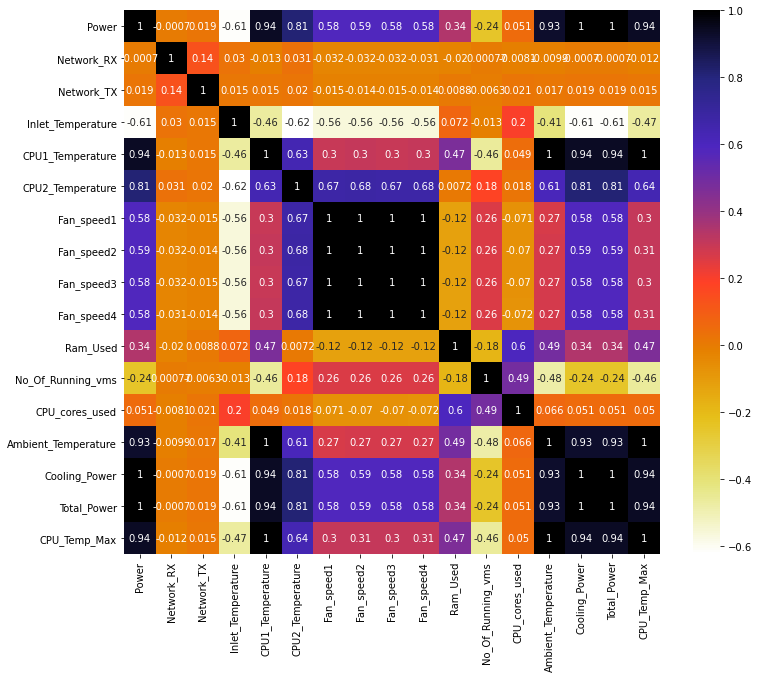

In [31]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = pc_dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [32]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [33]:
corr_features_mediam = correlation(pc_dataset, 0.8)
len(set(corr_features_mediam))

9

In [34]:
corr_features_mediam

{'Ambient_Temperature',
 'CPU1_Temperature',
 'CPU2_Temperature',
 'CPU_Temp_Max',
 'Cooling_Power',
 'Fan_speed2',
 'Fan_speed3',
 'Fan_speed4',
 'Total_Power'}

In [35]:
mc_dataset=pc_dataset.drop(corr_features_mediam,axis=1)

In [36]:
mc_dataset.shape

(13870, 8)

In [37]:
mc_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13870 entries, 0 to 13869
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Power              13870 non-null  float64
 1   Network_RX         13870 non-null  float64
 2   Network_TX         13870 non-null  float64
 3   Inlet_Temperature  13870 non-null  float64
 4   Fan_speed1         13870 non-null  float64
 5   Ram_Used           13870 non-null  float64
 6   No_Of_Running_vms  13870 non-null  float64
 7   CPU_cores_used     13870 non-null  float64
dtypes: float64(8)
memory usage: 867.0 KB


In [38]:
corr_features_high = correlation(pc_dataset, 0.9)
len(set(corr_features_high))

8

In [39]:
corr_features_high

{'Ambient_Temperature',
 'CPU1_Temperature',
 'CPU_Temp_Max',
 'Cooling_Power',
 'Fan_speed2',
 'Fan_speed3',
 'Fan_speed4',
 'Total_Power'}

In [40]:
hc_dataset=pc_dataset.drop(corr_features_high,axis=1)

In [41]:
hc_dataset.shape

(13870, 9)

In [42]:
hc_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13870 entries, 0 to 13869
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Power              13870 non-null  float64
 1   Network_RX         13870 non-null  float64
 2   Network_TX         13870 non-null  float64
 3   Inlet_Temperature  13870 non-null  float64
 4   CPU2_Temperature   13870 non-null  float64
 5   Fan_speed1         13870 non-null  float64
 6   Ram_Used           13870 non-null  float64
 7   No_Of_Running_vms  13870 non-null  float64
 8   CPU_cores_used     13870 non-null  float64
dtypes: float64(9)
memory usage: 975.4 KB


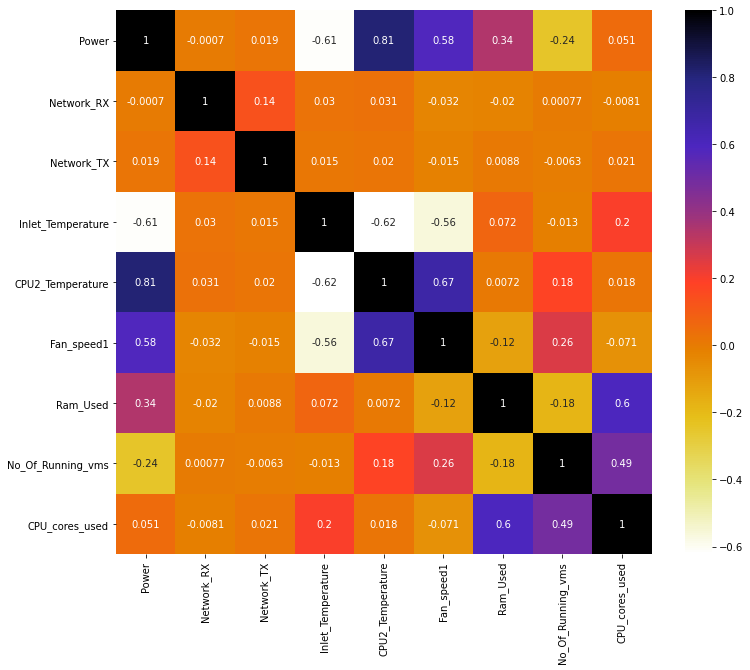

In [43]:

#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = hc_dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [44]:
## Capture the dependent feature
Y_train=dataset[['CPU_Load']]


In [45]:
## drop dependent feature from dataset
X_train=hc_dataset

In [46]:

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [47]:
### Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.004, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, Y_train)


SelectFromModel(estimator=Lasso(alpha=0.004, random_state=0))

In [48]:
feature_sel_model.get_support()

array([ True, False, False,  True,  True,  True,  True,  True,  True])

In [49]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))


total features: 9
selected features: 7


In [50]:
selected_feat

Index(['Power', 'Inlet_Temperature', 'CPU2_Temperature', 'Fan_speed1',
       'Ram_Used', 'No_Of_Running_vms', 'CPU_cores_used'],
      dtype='object')

In [51]:
not_selected=[feature for feature in X_train.columns if feature not in selected_feat]

In [52]:
not_selected

['Network_RX', 'Network_TX']

In [53]:
 lc_dataset = pd.concat([X_train[not_selected], Y_train], axis=1)

In [54]:
lc= lc_dataset.corr()

In [55]:
lc

,Network_RX,Network_TX,CPU_Load
Network_RX,1.000000,0.137877,0.019510
Network_TX,0.137877,1.000000,0.025648
CPU_Load,0.019510,0.025648,1.000000


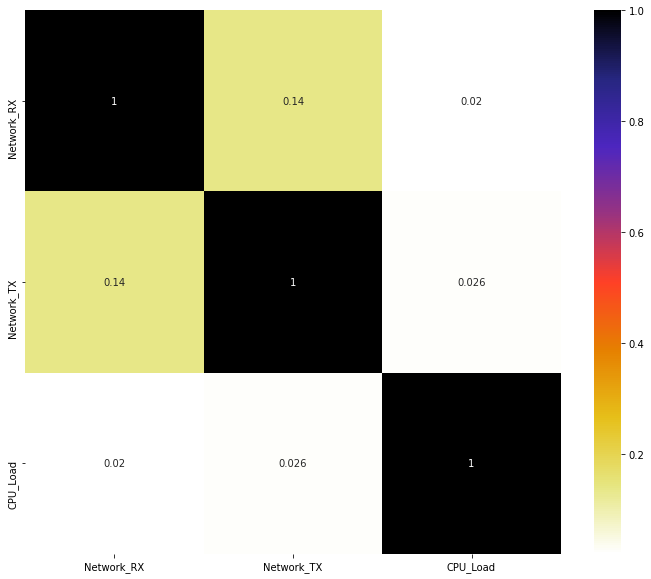

In [56]:

#Using Pearson Correlation
plt.figure(figsize=(12,10))
sns.heatmap(lc, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [57]:
X_train= X_train[['Power', 'Inlet_Temperature', 'CPU2_Temperature', 'Fan_speed1',
       'Ram_Used', 'No_Of_Running_vms', 'CPU_cores_used']]

In [58]:
X_train

,Power,Inlet_Temperature,CPU2_Temperature,Fan_speed1,Ram_Used,No_Of_Running_vms,CPU_cores_used
0,90.533333,16.966667,36.716667,7502.833333,0.584948,15.0,0.984375
1,88.933333,17.000000,37.083333,7141.166667,0.584948,15.0,0.984375
2,88.800000,17.000000,37.466667,6728.166667,0.584948,15.0,0.984375
3,89.866667,17.000000,37.550000,6813.333333,0.584948,15.0,0.984375
4,89.600000,16.950000,36.866667,7390.833333,0.584948,15.0,0.984375
...,...,...,...,...,...,...,...
13865,256.000000,16.000000,48.233333,8747.666667,0.679921,10.0,0.937500
13866,255.466667,16.433333,48.883333,8723.166667,0.679921,10.0,0.937500
13867,256.000000,16.283333,48.800000,8751.166667,0.679921,10.0,0.937500
13868,256.266667,16.083333,48.366667,8801.333333,0.679921,10.0,0.937500


## Feature scalling 

from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_scaler_train=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_scaler_train.head()

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaler_train=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_scaler_train.head()

,Power,Inlet_Temperature,CPU2_Temperature,Fan_speed1,Ram_Used,No_Of_Running_vms,CPU_cores_used
0,0.008796,0.593333,0.056761,0.320613,0.856223,0.714286,0.7875
1,0.003241,0.600000,0.069004,0.227464,0.856223,0.714286,0.7875
2,0.002778,0.600000,0.081803,0.121094,0.856223,0.714286,0.7875
3,0.006481,0.600000,0.084585,0.143029,0.856223,0.714286,0.7875
4,0.005556,0.590000,0.061770,0.291767,0.856223,0.714286,0.7875


In [60]:
import scipy.stats as stat
import pylab

In [61]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

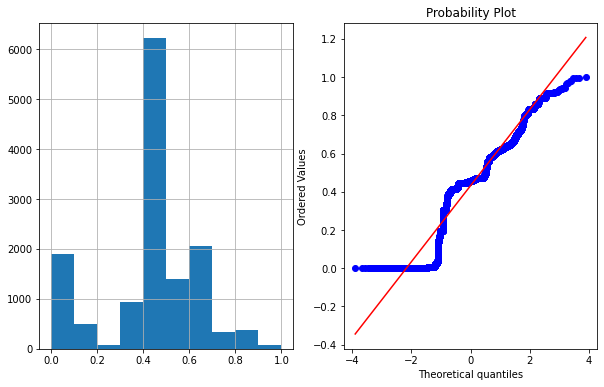

In [62]:
plot_data(X_scaler_train,'Power')


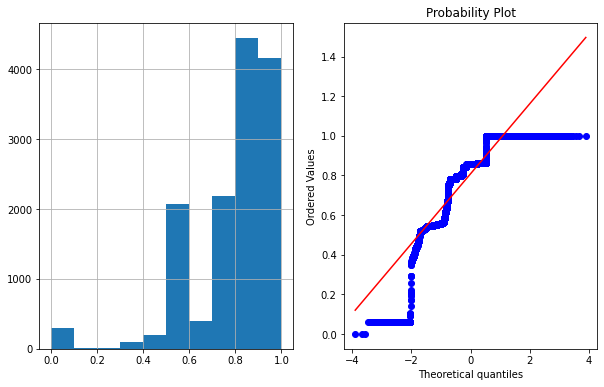

In [63]:
plot_data(X_scaler_train,'Ram_Used')

In [64]:
X_scaler_train.to_csv('X_train2020.csv')


In [65]:
Y_train.to_csv('Y_train2020.csv')

In [66]:
Y_train.head()

,CPU_Load
0,3.468500
1,3.622833
2,3.414500
3,3.332500
4,3.364000
